In [41]:
%cd /home/plent/Documenten/Gitlab/NeuralODEs/jax_neural_odes
# %reload_ext autoreload
from source.kinetic_mechanisms.JaxKineticMechanisms import  *
from source.kinetic_mechanisms.JaxKineticMechanismsCustom import *
## set up a small term system for state variables
# S=pd.DataFrame(np.array([[-1,1,2]]),index=['ICglucose'],columns=['v_GLT','v_HXK','v_NTH1'])
import diffrax
import numpy as np

# S=pd.DataFrame(np.array([[1,-1]]),index=['ICglucose'],columns=['v_GLT','v_HXK'])

import matplotlib.pyplot as plt
import pandas as pd

import jax
jax.config.update("jax_enable_x64", True)

/home/plent/Documenten/Gitlab/NeuralODEs/jax_neural_odes


In [42]:
def overwrite_y0_dict(y0_dict,dataset):
    """Overwrites the y0 dictionary with the values from the dataset"""
    ynew_dict=y0_dict.copy()
    dataset_iv=dataset.to_dict()

    for met in ynew_dict.keys():
        if met in dataset_iv.keys():
            ynew_dict[met]=dataset_iv[met]
        
    return ynew_dict



In [43]:

GLT_params={'p_GLT_KmGLTGLCi':1.0078,'p_GLT_KmGLTGLCo':1.0078,'p_GLT_VmGLT':8.1327}
# HXK1_params={'p_HXK1_Kglc':0.3483,'p_HXK_Vmax':1 * 6.2548 *(1 + 0)}

HXK1_params={"p_HXK1_Kadp": 0.3492,"p_HXK1_Katp": 0.0931,
    "p_HXK1_Keq": 3.7213e+03,"p_HXK1_Kg6p": 34.7029,
    "p_HXK1_Kglc": 0.3483,"p_HXK1_Kt6p": 0.0073,"p_HXK_Vmax": 1 * 6.2548 * (1 + 0) }


NTH1_params={"p_NTH1_Ktre" : 2.1087,"p_NTH1_kcat" : 4.5132,"f_NTH1" : 0.0020,"p_NTH1_Vmax" : 4.5132 * 0.0020}


PGI_params={ "p_PGI1_Keq": 0.9564,"p_PGI1_Kf6p": 7.2433,"p_PGI1_Kg6p": 33.0689,'p_PGI1_Vmax':1*2.3215*1}



PGM1_params={"p_PGM1_Keq": 21.3955,"p_PGM1_Kg1p": 0.0653,"p_PGM1_Kg6p": 0.0324,"p_PGM1_Vmax":8.4574}
TPS1_params={ "p_TPS1_Kg6p": 4.5359,"p_TPS1_Kudp_glc": 0.1268,"p_TPS1_Kpi": 0.7890,"p_TPS1_KmF6P": 1.5631,"p_TPS1_Vmax":9.6164e+03*0.0014}
TPS2_params={"p_TPS2_Kt6p": 0.3686,"p_TPS2_Kpi": 0.7023,"p_TPS2_Vmax": 28.4097 * 0.0013}  # Calculated value for p_TPS2_Vmax
UGP_params={"f_UGP1":3.1000e-04}


PFK_params= {"p_PFK_Camp": 0.0287,"p_PFK_Catp": 1.2822,"p_PFK_Cf16bp": 2.3638,"p_PFK_Cf26bp": 0.0283,"p_PFK_Ciatp": 40.3824,"p_PFK_Kamp": 0.0100,
    "p_PFK_Katp": 1.9971,"p_PFK_Kf16bp": 0.0437,"p_PFK_Kf26bp": 0.0012,"p_PFK_Kf6p": 0.9166,"p_PFK_Kiatp": 4.9332,"p_PFK_L": 1.3886,
    "p_PFK_gR": 1.8127,"p_PFK_F26BP": 1e-3,"p_PFK_Vmax": 1 * 8.7826 * 1  # Calculated as p_PFK_ExprsCor * p_PFK_kcat * f_PFK
}

ALD_params = {
    "p_FBA1_Kdhap": 0.0300,"p_FBA1_Keq": 0.1223,"p_FBA1_Kf16bp": 0.6872,"p_FBA1_Kglyceral3p": 3.5582,"p_FBA1_Vmax": 4.4067 * 1}  # Calculated as p_FBA1_kcat * f_FBA1}



TPI1_params = {"p_TPI1_Kdhap": 205.9964,"p_TPI1_Keq": 0.0515,"p_TPI1_Kglyceral3p": 8.8483,"p_TPI1_Vmax":16.1694}


G3PDH_params = {"p_GPD1_Kadp": 1.1069,"p_GPD1_Katp": 0.5573,"p_GPD1_Kdhap": 2.7041,"p_GPD1_Keq": 1.0266e+04,
    "p_GPD1_Kf16bp": 12.7519,"p_GPD1_Kglyc3p": 3.2278,"p_GPD1_Knad": 0.6902,"p_GPD1_Knadh": 0.0322,"p_GPD1_Vmax": 1.7064 * 1}

PGK_params = {"p_PGK_KeqPGK": 3.2348e+03,"p_PGK_KmPGKADP": 0.2064,
    "p_PGK_KmPGKATP": 0.2859,"p_PGK_KmPGKBPG": 0.0031,"p_PGK_KmPGKP3G": 0.4759,
    "p_PGK_VmPGK": 55.1626,"p_PGK_ExprsCor": 1}


GAPDH_params = {
    "p_TDH1_Keq": 0.0054,"p_TDH1_Kglyceral3p": 4.5953,"p_TDH1_Kglycerate13bp": 0.9076,"p_TDH1_Knad": 1.1775,
    "p_TDH1_Knadh": 0.0419,"p_TDH1_Kpi": 0.7731,"p_GAPDH_Vmax": 1 * 78.6422 * (1 + 0 + 0)  # p_GAPDH_ExprsCor * p_TDH1_kcat * (f_TDH1 + f_TDH2 + f_TDH3)
}
vsink3PGA_params={"poly_sinkP3G" : 1e-03,"km_sinkP3G":0.007881000000000} #reverse the sink sign, otherwise it doesnt work

#MODELLING REACTION


HOR2_params = {
    "p_HOR2_Kglyc3p": 2.5844,
    "p_HOR2_Kpi": 2.5491,
    "p_HOR2_Vmax": 1.2748 * 1}

GlycT_params={"p_GlycerolTransport" : 0.1001,"f_GLYCEROL_e" : 0.1}

PGM_params = {
    "p_PGM_K2pg": 0.0750,"p_PGM_K3pg": 1.4151,"p_PGM_Keq": 0.1193,"p_PGM_Vm": 11.3652}

ENO1_params={"p_ENO1_K2pg": 0.0567,
    "p_ENO1_Keq": 4.3589,
    "p_ENO1_Kpep": 0.4831,
    "p_ENO1_Vm": 3.3018}


PYK1_params = {
    "p_PYK1_Kadp": 0.2430,"p_PYK1_Katp": 9.3000,"p_PYK1_Kf16bp": 0.1732,
    "p_PYK1_Kpep": 0.2810,"p_PYK1_L": 60000,
    "p_PYK1_hill": 4,"p_PYK1_Vm":9.3167}
PDC_params = {"p_PDC1_Kpi": 9.4294,"p_PDC1_Kpyr": 12.9680,
    "p_PDC1_hill": 0.7242,"p_PDC1_Vmax": 1 * 8.3613 * 0.5290  }
# }
ADH_params = {
    'p_ADH_KeqADH': 6.8487e-05,'p_ADH_KiADHACE': 0.6431,
    'p_ADH_KiADHETOH': 59.6935,'p_ADH_KiADHNAD': 0.9677,
    'p_ADH_KiADHNADH': 0.0316,'p_ADH_KmADHACE': 1.1322,
    'p_ADH_KmADHETOH': 4.8970,'p_ADH_KmADHNAD': 0.1534,
    'p_ADH_KmADHNADH': 0.1208,'p_ADH_VmADH': 13.2581,"p_ADH_ExprsCor":1}

mito_params = {"p_mitoVmax": 1.6034,"p_mitoADPKm": 0.3394,"p_mitoPiKm": 0.4568}
ATPase_params={"p_ATPase_ratio":0.23265} #might be adjusted on perturbation

#mitonadh
mitoNADH_params={"p_mitoNADHVmax":0.2401,
                 "p_mitoNADHKm":1.0e-3}


vsinkPEP_params={"km_sinkPEP":1e-03 } #reverse stoichiometry
vsinkACE_params={"km_sinkACE":1e-04} #reverse stoichiometry
vsinkPYR_params={"km_sinkPYR":1e-03} #reverse stoichiometry
vsink3PGA_params={"km_sinkP3G":1e-03} #reverse the sink sign, otherwise it doesnt work
v_sinkG6P_params={'km_sinkG6P':1e-02} #reverse stoichiometry
v_sinkF6P_params={'km_sinkF6P':1e-04} #poly sinks are not learned anymore
v_sinkGAP={"poly_sinkGAP":0.012626,"km_sinkGAP":5e-04}


UGP_params={"flux_ugp":3.1000e-04}
ETOH_params={"p_kETOHtransport" : 0.0328,"f_ETOH_e" : 0.00001}

ADK1_params={"p_ADK1_k" : 77.3163,"p_ADK1_Keq" : 0.2676}
VacPi_params={"p_vacuolePi_k" : 0.1699,"p_vacuolePi_steadyStatePi" : 10}
AMD1_params={"p_Amd1_K50" : 10.9184,"p_Amd1_Kpi" : 1.6184e+03,"p_Amd1_Katp" : 5000,"p_Amd1_Vmax" : 0.00001}

ADE_params={"p_Ade13_Ade12_k" : 0.6298} #is not constant!!!!!!!!!!!!!!
ISN1_params={"p_Isn1_k":0.0001} #or 0
PNP1_params={"p_Pnp1_k":0.0001} # or 0
HPT1_params={"p_Hpt1_k":0.0001} #or 0


params={**GLT_params,**HXK1_params,**NTH1_params,
        **NTH1_params,**PGI_params,**v_sinkG6P_params,
        **PGM1_params,**TPS1_params,**TPS2_params,
        **v_sinkF6P_params,**UGP_params,
        **PFK_params,**ALD_params,**v_sinkGAP,
        **TPI1_params,**G3PDH_params,
        **GAPDH_params,**PGK_params,**vsink3PGA_params,
        **HOR2_params,**GlycT_params,**PGM_params,
        **ENO1_params,**vsinkPEP_params,**vsinkPEP_params,
        **PYK1_params,**vsinkPYR_params,**PDC_params,**ADH_params,
        **vsinkACE_params,**ETOH_params,**mitoNADH_params,**UGP_params,
        **mito_params,**ATPase_params,**ADK1_params,
        **VacPi_params,**AMD1_params,**ADE_params,
        **ISN1_params,**PNP1_params,**HPT1_params} #remove v_sinkF16P








print("n_parameters",len(params))


   



##
v_GLT=Jax_Facilitated_Diffusion(substrate_extracellular='ECglucose',product_intracellular='ICglucose',vmax="p_GLT_VmGLT",km_internal='p_GLT_KmGLTGLCi',km_external='p_GLT_KmGLTGLCo')

v_HXK=Jax_Rev_BiBi_MM_w_Inhibition(substrate1='ICATP',substrate2="ICglucose",product1="ICADP",product2="ICATP",modifier="ICT6P",vmax="p_HXK_Vmax", k_equilibrium="p_HXK1_Keq", km_substrate1="p_HXK1_Katp", 
                                           km_substrate2="p_HXK1_Kglc",
                                           km_product1="p_HXK1_Kadp", km_product2="p_HXK1_Kg6p", ki_inhibitor="p_HXK1_Kt6p")



v_NTH1=Jax_Irrev_MM_Uni(substrate='ICtreh',vmax='p_NTH1_Vmax',km_substrate='p_NTH1_Ktre')
v_PGI=Jax_Rev_UniUni_MM(substrate='ICG6P',product='ICF6P',vmax='p_PGI1_Vmax',k_equilibrium='p_PGI1_Keq',km_substrate='p_PGI1_Kg6p',km_product='p_PGI1_Kf6p')
v_sinkG6P=Jax_MM_Sink(substrate='ICG6P',v_sink='poly_sinkG6P',km_sink='km_sinkG6P')
v_sinkF6P=Jax_MM_Sink(substrate='ICF6P',v_sink='poly_sinkF6P',km_sink='km_sinkF6P')
v_PGM1=Jax_Rev_UniUni_MM(substrate='ICG1P',product='ICG6P',vmax='p_PGM1_Vmax',k_equilibrium='p_PGM1_Keq',km_substrate='p_PGM1_Kg1p',km_product='p_PGM1_Kg6p') #to do v_TPS1 for 2nd rate law

# inhibitor_TPS1=SimpleInhibitor(k_I='p_TPS1_Kpi')
activator_TPS1=SimpleActivator(k_A="p_TPS1_KmF6P")
v_TPS1=Jax_Irrev_MM_Bi_w_Modifiers(substrate1="ICG6P",substrate2="ICG1P",modifiers_list=['ICF6P'],vmax="p_TPS1_Vmax",km_substrate1="p_TPS1_Kg6p",
                                  km_substrate2="p_TPS1_Kudp_glc",modifiers=[activator_TPS1])

# v_TPS1=Jax_Irrev_MM_Bi(substrate1="ICG6P",substrate2="ICG1P",vmax="p_TPS1_Vmax",km_substrate1="p_TPS1_Kg6p",km_substrate2="p_TPS1_Kudp_glc")
v_TPS2=Jax_Irrev_MM_Bi_w_Inhibition(substrate="ICT6P",product="ICPHOS",vmax="p_TPS2_Vmax", km_substrate1="p_TPS2_Kt6p", ki="p_TPS2_Kpi")



v_PFK=Jax_Specific(substrate1="ICF6P",substrate2="ICATP",product1="ICFBP",modifier="ICAMP",vmax="p_PFK_Vmax",kr_F6P="p_PFK_Kf6p", kr_ATP="p_PFK_Katp", gr="p_PFK_gR",c_ATP="p_PFK_Catp", ci_ATP="p_PFK_Ciatp", ci_AMP="p_PFK_Camp", 
                           ci_F26BP="p_PFK_Cf26bp", ci_F16BP="p_PFK_Cf16bp", l="p_PFK_L", 
                           kATP="p_PFK_Kiatp", kAMP="p_PFK_Kamp", F26BP ="p_PFK_F26BP",
                           kF26BP = "p_PFK_Kf26bp", kF16BP = "p_PFK_Kf16bp")
v_ALD=Jax_Rev_MM_UniBi(substrate='ICFBP',product1='ICGAP',product2='ICDHAP',vmax="p_FBA1_Vmax", k_equilibrium="p_FBA1_Keq", km_substrate="p_FBA1_Kf16bp",
                                    km_product1="p_FBA1_Kglyceral3p", km_product2="p_FBA1_Kdhap" )
v_TPI1=Jax_Rev_UniUni_MM(substrate="ICDHAP",product="ICGAP",vmax="p_TPI1_Vmax",k_equilibrium="p_TPI1_Keq", km_substrate="p_TPI1_Kdhap",
                                km_product="p_TPI1_Kglyceral3p")
v_sinkGAP=Jax_MM_Sink(substrate="ICGAP",v_sink="poly_sinkGAP",km_sink="km_sinkGAP")
v_G3PDH=Jax_Rev_BiBi_MM_w_Activation(substrate1="ICDHAP",substrate2="ICNADH",product1="ICG3P",product2="ICNAD",modifiers=['ICFBP', 'ICATP', 'ICADP'],vmax="p_GPD1_Vmax", k_equilibrium="p_GPD1_Keq", 
                                             km_substrate1="p_GPD1_Kdhap", km_substrate2="p_GPD1_Knadh",
                                             km_product1="p_GPD1_Kglyc3p", km_product2="p_GPD1_Knad",
                                               ka1="p_GPD1_Kf16bp", ka2="p_GPD1_Katp", ka3="p_GPD1_Kadp")
v_GAPDH=Jax_MM_Ordered_Bi_Tri(substrate1="ICGAP",substrate2="ICNAD",substrate3="ICPHOS",product1="ICBPG",product2="ICNADH",
                              vmax="p_GAPDH_Vmax", k_equilibrium="p_TDH1_Keq", km_substrate1="p_TDH1_Kglyceral3p",
                                      km_substrate2="p_TDH1_Knad", ki="p_TDH1_Kpi", 
                                      km_product1="p_TDH1_Kglycerate13bp", km_product2="p_TDH1_Knadh") #might exchange this mechanism by a BiBi mechanism, since modeling Phos is a bit too much
v_PGK=Jax_Rev_BiBi_MM(substrate1="ICBPG",substrate2="ICADP",product1="IC3PG",product2="ICATP",vmax="p_PGK_VmPGK",k_equilibrium="p_PGK_KeqPGK", 
                               km_substrate1="p_PGK_KmPGKBPG", km_substrate2="p_PGK_KmPGKADP", 
                               km_product1="p_PGK_KmPGKP3G", km_product2="p_PGK_KmPGKATP")
vsink3PGA=Jax_MM_Sink(substrate='IC3PG',v_sink='poly_sinkP3G',km_sink='km_sinkP3G')
#modeling reaction

# v_sinkDHAP=Jax_MM_Sink(substrate="ICDHAP",v_sink="poly_sinkDHAP",km_sink="km_sinkDHAP")

#hor2: might not be quite correct
HOR2_inhibition_Pi=SimpleInhibitor(k_I="p_HOR2_Kpi")
v_HOR2=Jax_Irrev_MM_Uni_w_Modifiers(substrate="ICG3P",vmax="p_HOR2_Vmax",km_substrate="p_HOR2_Kglyc3p",modifiers_list=["ICPHOS"],modifiers=[HOR2_inhibition_Pi])
v_GlycT=Jax_Diffusion(substrate="ICglyc",enzyme="f_GLYCEROL_e",transport_coef="p_GlycerolTransport")
v_PGM=Jax_Rev_UniUni_MM(substrate="IC3PG",product="IC2PG",vmax="p_PGM_Vm", k_equilibrium="p_PGM_Keq",
                                 km_substrate="p_PGM_K3pg", km_product="p_PGM_K2pg")

v_ENO=Jax_Rev_UniUni_MM(substrate="IC2PG",product="ICPEP",vmax="p_ENO1_Vm",k_equilibrium="p_ENO1_Keq",
                                km_substrate="p_ENO1_K2pg", km_product="p_ENO1_Kpep")

vsinkPEP = Jax_MM_Sink(substrate="ICPEP",v_sink="poly_sinkPEP", km_sink="km_sinkPEP") #reverse sign in stoichiometry
v_PYK1=Jax_Hill_Bi_Irreversible_Activation(substrate1="ICPEP",substrate2="ICADP",activator="ICFBP",product="ICATP",vmax="p_PYK1_Vm", hill="p_PYK1_hill",
                                                  k_substrate1="p_PYK1_Kpep", k_substrate2="p_PYK1_Kadp",
                                                  k_product="p_PYK1_Katp", k_activator="p_PYK1_Kf16bp", l="p_PYK1_L")
vsinkPYR=Jax_MM_Sink(substrate="ICPYR",v_sink="poly_sinkPYR", km_sink="km_sinkPYR")
v_PDC=Jax_Hill_Irreversible_Inhibition(substrate="ICPYR",inhibitor="ICPHOS",vmax="p_PDC1_Vmax",k_half_substrate="p_PDC1_Kpyr",
                                               hill="p_PDC1_hill", ki="p_PDC1_Kpi")



v_mitoNADH=Jax_MM(substrate="ICNADH",vmax="p_mitoNADHVmax",km="p_mitoNADHKm") #I think this can be replaced by Jax_Irrev_MM_Uni

v_ADH = Jax_ADH_Reaction(NAD="ICNAD",ETOH="ICETOH",NADH="ICNADH",ACE="ICACE",
    vmax='p_ADH_VmADH',
    k_equilibrium='p_ADH_KeqADH',km_substrate1='p_ADH_KiADHNAD',
    km_substrate2='p_ADH_KmADHETOH',km_product1='p_ADH_KmADHACE',
    km_product2='p_ADH_KmADHNADH',ki_substrate1='p_ADH_KiADHNAD',
    ki_substrate2='p_ADH_KiADHETOH',ki_product1='p_ADH_KiADHACE',
    ki_product2='p_ADH_KiADHNADH',exprs_cor="p_ADH_ExprsCor")


vsinkACE=Jax_MM_Sink(substrate="ICACE",v_sink="poly_sinkACE",km_sink="km_sinkACE")
v_EtohT = Jax_Diffusion(substrate="ICETOH",enzyme="f_ETOH_e", transport_coef="p_kETOHtransport")

#new 
v_ATPmito=Jax_Irrev_MM_Bi("ICADP","ICPHOS",vmax="p_mitoVmax",km_substrate1="p_mitoADPKm",
                                  km_substrate2="p_mitoPiKm")
v_ATPase=Jax_ATPase("ICATP","ICADP",ATPase_ratio="p_ATPase_ratio")
v_ADK=Jax_MA_Rev_Bi(substrate1="ICADP",substrate2="ICADP",product1="ICATP",product2="ICAMP",k_equilibrium="p_ADK1_Keq",k_fwd="p_ADK1_k")
v_VacPi=Jax_MA_Rev(substrate="ICPHOS",k="p_vacuolePi_k",steady_state_substrate="p_vacuolePi_steadyStatePi")
v_AMD1=Jax_Amd1(substrate="ICAMP",product="ICATP",modifier="ICPHOS",vmax="p_Amd1_Vmax", k50="p_Amd1_K50", ki="p_Amd1_Kpi", k_atp="p_Amd1_Katp")
v_ADE1312=Jax_MA_Irrev(substrate="ICIMP",k_fwd="p_Ade13_Ade12_k")

#new new
v_ISN1=Jax_MA_Irrev(substrate="ICIMP",k_fwd="p_Isn1_k")
v_PNP1=Jax_MA_Irrev(substrate="ICINO",k_fwd="p_Pnp1_k")
v_HPT1=Jax_MA_Irrev(substrate="ICHYP",k_fwd="p_Hpt1_k")






n_parameters 141


In [44]:
## retrieve interpolations from data. These are either expression levels of enzymes at different growth rates and the glucose interpolation.

#interpolations

expression_data=pd.read_csv("datasets/VanHeerden_Glucose_Pulse/PvanHoekExpressionData.csv",index_col=0)

column_pairs = [
    ('D_HXK', 'HXK'),('D_PGI', 'PGI'),
    ('D_PFK', 'PFK'),('D_FBA', 'FBA'),
    ('D_TPI', 'TPI'),('D_GAPDH', 'GAPDH'),
    ('D_PGK', 'PGK'),('D_PGM', 'PGM'),
    ('D_ENO', 'ENO'),('D_PYK', 'PYK'),
    ('D_PDC', 'PDC'),('D_ADH', 'ADH')]

interpolation_expression_dict = {}

Ds=jnp.linspace(0,0.375,100)

for D_col, col in column_pairs:
    interp_key=f"expr_interpolated_{col}"
    interpolation_expression_dict[interp_key] = diffrax.LinearInterpolation(ts=jnp.array(expression_data[D_col]),ys=jnp.array(expression_data[col]))






In [45]:
from scipy.io import loadmat

vHeerdenData=loadmat("datasets/VanHeerden_Glucose_Pulse/vHeerden_trehalose_data_micromolgdw.mat")

#converted to mmol/L by dividing by 2 (1gdw=2ml)
timeseries_metabolites=vHeerdenData['data']['metabolites'][0][0]/2
metabolite_names=vHeerdenData['data']['legenda_metabolites'][0][0][0]
timepoints_metabolites=vHeerdenData['data']['time_metabolites'][0][0]


timeseries_nucleotides=vHeerdenData['data']['nucleotides'][0][0]/2
nucleotide_names=vHeerdenData['data']['legenda_nucleotides'][0][0][0]
timepoints_nucleotides=vHeerdenData['data']['time_nucleotides'][0][0]



metabolite_names=[str(i[0]) for i in metabolite_names]
nucleotide_names=[str(i[0]) for i in nucleotide_names]
timepoints=[float(i) for i in timepoints_metabolites]

timeseries_data_metabolites=pd.DataFrame(timeseries_metabolites,columns=metabolite_names,index=timepoints)
timeseries_data_nucleotides=pd.DataFrame(timeseries_nucleotides,columns=nucleotide_names,index=timepoints)
timeseries_data=pd.concat([timeseries_data_metabolites,timeseries_data_nucleotides],axis=1)

timeseries_data=timeseries_data.rename({"Glc_ext":"ECglucose","G6P":"ICG6P","F6P":"ICF6P",
                        "FBP":"ICFBP","GAP":"ICGAP","PG3":"IC3PG",
                        "PEP":"ICPEP","ATP":"ICATP","ADP":"ICADP","AMP":"ICAMP",
                        "G1P":"ICG1P","T6P":"ICT6P","Tre":"ICtreh","Tre6P":"ICT6P"},axis=1)

timeseries_data.to_csv("datasets/VanHeerden_Glucose_Pulse/vHeerden_trehalose_data_formatted.csv")


# plt.plot(timeseries_nucleotides)
interpolation_dict={}
coeffs_ECglucose=diffrax.backward_hermite_coefficients(ts=jnp.array(timepoints),ys=jnp.array(timeseries_data['ECglucose']),fill_forward_nans_at_end=True)
EC_glucose_interpolation_cubic=diffrax.CubicInterpolation(ts=jnp.array(timepoints),coeffs=coeffs_ECglucose)
interpolation_dict['ECglucose']=EC_glucose_interpolation_cubic




/tmp/ipykernel_63991/2581362581.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  timepoints=[float(i) for i in timepoints_metabolites]


In [46]:
# change parameters to include expression level]

def update_parameters_by_dilution_rate(interpolation_expression_dict,D):
    #updates parameters by the dilution rate dependency
    params['p_HXK_Vmax'] = interpolation_expression_dict['expr_interpolated_HXK'].evaluate(D) * params['p_HXK_Vmax']
    params['p_PGI1_Vmax'] = interpolation_expression_dict['expr_interpolated_PGI'].evaluate(D) *  params['p_PGI1_Vmax']
    params['p_PFK_Vmax'] = interpolation_expression_dict['expr_interpolated_PFK'].evaluate(D) *  params['p_PFK_Vmax']
    params['p_FBA1_Vmax'] = interpolation_expression_dict['expr_interpolated_FBA'].evaluate(D) * params['p_FBA1_Vmax']
    params['p_TPI1_Vmax'] = interpolation_expression_dict['expr_interpolated_TPI'].evaluate(D) * params['p_TPI1_Vmax']
    params['p_GAPDH_Vmax'] = interpolation_expression_dict['expr_interpolated_GAPDH'].evaluate(D) * params['p_GAPDH_Vmax']
    params['p_PGK_VmPGK'] = interpolation_expression_dict['expr_interpolated_PGK'].evaluate(D) * params['p_PGK_VmPGK']
    params['p_PGM1_Vmax'] = interpolation_expression_dict['expr_interpolated_PGM'].evaluate(D) * params['p_PGM1_Vmax']
    params['p_ENO1_Vm'] = interpolation_expression_dict['expr_interpolated_ENO'].evaluate(D) * params['p_ENO1_Vm']
    params['p_PYK1_Vm'] = interpolation_expression_dict['expr_interpolated_PYK'].evaluate(D) * params['p_PYK1_Vm']
    params['p_PDC1_Vmax'] = interpolation_expression_dict['expr_interpolated_PDC'].evaluate(D) * params['p_PDC1_Vmax']
    params['p_ADH_VmADH'] = interpolation_expression_dict['expr_interpolated_ADH'].evaluate(D) * params['p_ADH_VmADH']
    return params

In [75]:
class glycolysis():
    def __init__(self,
                  interpolate_dict:dict,

                  met_names:list,
                  dilution_rate:float):
       self.interpolate_dict=interpolate_dict
       self.met_names=met_names
       self.dilution_rate=dilution_rate


    def __call__(self,t,y,args):
        params=args
        y=dict(zip(self.met_names,y))
        D=self.dilution_rate #dilution rate. In steady state D=mu
        y['ECglucose']=self.interpolate_dict['ECglucose'].evaluate(t)
        # y['ECglucose']=110
        eval_dict={**y,**params}

        #polysinks are know related to the dilution rate, like in the original model. We ensure positive values to ensure that the log transformation works

        #perhaps we could move this outside of the 
        
        eval_dict['poly_sinkG6P']=jnp.abs(3.6854 * D**3 -   1.4119 * D**2 -  0.6312* D    - 0.0043) 
        eval_dict['poly_sinkF6P']=jnp.abs(519.3740 * D**6 - 447.7990 * D**5 + 97.2843 * D**4 + 8.0698 * D**3 - 4.4005 * D**2 + 0.6254 * D - 0.0078)
        eval_dict['poly_sinkGAP']=jnp.abs(170.8447 * D**6 - 113.2975 * D**5 + 2.6494 * D**4 + 10.2461 * D**3 - 1.8002 * D**2 + 0.1988 * D + 0.0012)
        eval_dict['poly_sinkP3G']=jnp.abs(-0.2381* D**2 - 0.0210 * D -0.0034)
        eval_dict['poly_sinkPEP']=jnp.abs(- 0.0637 * D**2 -   0.0617 * D   -  0.0008)
        eval_dict['poly_sinkPYR']=jnp.abs(-8.4853e+03 * D**6 + 9.4027e+03 * D**5 - 3.8027e+03 * D**4 + 700.5 * D**3 - 60.26 * D**2 + 0.711 * D - 0.0356)
        eval_dict['poly_sinkACE']=jnp.abs(118.8562 * D**6 - 352.3943 * D**5 + 245.6092 * D**4 - 75.2550 * D**3 + 11.1153 * D**2 - 1.0379 * D + 0.0119)


        ## calculate the expression given the dilution rate and update parameters

        rate_vGLT=v_GLT(eval_dict)
        rate_vHXK=v_HXK(eval_dict)
        rate_vNTH1=v_NTH1(eval_dict)
        rate_vPGI=v_PGI(eval_dict)

        rate_vsinkG6P=v_sinkG6P(eval_dict)
        rate_vsinkF6P=v_sinkF6P(eval_dict)
        rate_vPGM1=v_PGM1(eval_dict)
        rate_vTPS1=v_TPS1(eval_dict)
        rate_vTPS2=v_TPS2(eval_dict)
        rate_vPFK=v_PFK(eval_dict)
        rate_vALD=v_ALD(eval_dict)

        rate_TPI1=v_TPI1(eval_dict)
        rate_GP3DH=v_G3PDH(eval_dict)
        rate_PGK=v_PGK(eval_dict)
        rate_vsinkGAP=v_sinkGAP(eval_dict)
        rate_GAPDH=v_GAPDH(eval_dict)
        rate_vsink3PGA=vsink3PGA(eval_dict)
        rate_HOR2=v_HOR2(eval_dict)
        rate_vGLycT=v_GlycT(eval_dict)
        rate_PGM=v_PGM(eval_dict)
        rate_ENO=v_ENO(eval_dict)
        rate_vsinkPEP=vsinkPEP(eval_dict)
        rate_PYK1=v_PYK1(eval_dict)
        rate_vsinkPYR=vsinkPYR(eval_dict)
        rate_vPDC=v_PDC(eval_dict)
        rate_ADH=v_ADH(eval_dict)
        rate_vsinkACE=vsinkACE(eval_dict)
        rate_ETOH_transport=v_EtohT(eval_dict)
        rate_vmitoNADH=v_mitoNADH(eval_dict)
        
        #modeling rates: new rates
        rate_ATPmito=v_ATPmito(eval_dict)
        rate_ATPase=v_ATPase(eval_dict)
        rate_ADK1=v_ADK(eval_dict)
        rate_VacPi=v_VacPi(eval_dict)
        rate_AMD1=v_AMD1(eval_dict)
        rate_ADE1312=v_ADE1312(eval_dict)
        rate_ISN1=v_ISN1(eval_dict)
        rate_PNP1=v_PNP1(eval_dict)
        rate_HPT1=v_HPT1(eval_dict)


        dG1P=-rate_vPGM1-params['flux_ugp']
        dT6P=+rate_vTPS1 -rate_vTPS2
        dICTRE=+rate_vTPS2 -rate_vNTH1


        dICglci=+rate_vGLT - rate_vHXK +2*rate_vNTH1

        dICG6P=+rate_vHXK-rate_vPGI -rate_vsinkG6P +rate_vPGM1-rate_vTPS1#we reverse the direction of the sink, since in logspace parameters cannot be negative
        dICF6P=+rate_vPGI +rate_vsinkF6P-rate_vPFK
        dICFBP=+rate_vPFK -rate_vALD

        dICDHAP=+rate_vALD - rate_TPI1 - rate_GP3DH #modelling reaction rate_vsinkDHAP
        dICG3P=+rate_GP3DH-rate_HOR2
        dICGlyc=+rate_HOR2-rate_vGLycT

        dICGAP=+rate_vALD +rate_TPI1  -rate_GAPDH +rate_vsinkGAP
        dICBPG=+rate_GAPDH -rate_PGK
        dIC3PG=+rate_PGK - rate_vsink3PGA -rate_PGM#reverse the sign of vsink3PGA, it had a negative value, but we do not allow negative parameters
        dIC2PG=+rate_PGM-rate_ENO

        dICPEP=+rate_ENO -rate_vsinkPEP-rate_PYK1 
        
        dICPYR= +rate_PYK1 -rate_vPDC -rate_vsinkPYR 
        
        dICACE= +rate_vPDC -rate_ADH -rate_vsinkACE

        dICETOH=+rate_ADH -rate_ETOH_transport

        # dECETOH=+rate_ETOH_transport *3.7683658170914542 *0.002-((y['ECETOH']/3600)*D)

        #so it turns out G3PDH is the problematic one
        dICNAD=+rate_GP3DH -rate_GAPDH   +rate_ADH +rate_vmitoNADH 
        dICNADH=-rate_GP3DH +rate_GAPDH   -rate_ADH -rate_vmitoNADH
        #rate_vmitoNADH is fine,
        dATP=+rate_ADK1-rate_vHXK -rate_ATPase -rate_vPFK + rate_PGK +rate_PYK1 -rate_vTPS1 +rate_ATPmito
        dADP=-2*rate_ADK1+rate_vHXK +rate_ATPase +rate_vPFK -rate_PGK - rate_PYK1 +rate_vTPS2 -rate_ATPmito
        dAMP=+rate_ADK1  -rate_AMD1 +rate_ADE1312
        
        dPHOS=-rate_GAPDH +rate_ATPase +rate_HOR2 +2*rate_vTPS1 +rate_vTPS2 -rate_ATPmito +rate_ISN1-rate_PNP1 +rate_VacPi +rate_vsinkG6P -rate_vsinkF6P +rate_vsink3PGA +rate_vsinkPEP-rate_vsinkGAP
        dIMP=rate_AMD1-rate_ADE1312+rate_HPT1-rate_ISN1
        dINO=rate_ISN1-rate_PNP1
        dHYP=+rate_PNP1 -rate_HPT1


        return jnp.stack([dG1P,dT6P,dICTRE,dICglci,dICG6P,dICF6P,
                          dICFBP,dICDHAP,dICG3P,
                          dICGlyc,dICGAP,dICBPG,dIC3PG,
                          dIC2PG,dICPEP,dICPYR,dICACE,dICETOH,dICNADH,
                          dICNAD,dATP,dADP,dAMP,dPHOS,dIMP,dINO,dHYP])#,dICPEP,dICPYR,dICACE])
    

class NeuralODE():
    def __init__(self,func):

        self.func=func
        self.rtol=1e-9
        self.atol=1e-11
        self.max_steps=200000
        
    def __call__(self,ts,y0,params):
        solution = diffrax.diffeqsolve(
        diffrax.ODETerm(self.func),
        diffrax.Kvaerno5(),
        t0=ts[0],
        t1=ts[-1],
        dt0=1e-10,
        y0=y0,
        args=(params),
        stepsize_controller=diffrax.PIDController(rtol=self.rtol, atol=self.atol,pcoeff=0.4,icoeff=0.3,dcoeff=0),
        saveat=diffrax.SaveAt(ts=ts),
        max_steps=self.max_steps)

        return solution.ys
    


y0_dict={'ICG1P':0.064568,
        "ICT6P":0.093705,
        "ICtreh":63.312040,
        'ICglucose':0.196003,
        'ICG6P':0.716385,
        'ICF6P':0.202293,
        "ICFBP":0.057001,
        "ICDHAP":0.048571,
        "ICG3P":0.020586,
        "ICglyc":0.1,
        "ICGAP":0.006213,
        "ICBPG":0.0001,
        "IC3PG":2.311074,
        "IC2PG":0.297534,
        "ICPEP":1.171415,
        "ICPYR":0.152195,
        "ICACE":0.04,
        "ICETOH":10.0,
        # "ECETOH":0,
        "ICNADH":0.0106,
        "ICNAD":1.5794,
        "ICATP":3.730584,
        "ICADP":1.376832,
        "ICAMP":0.431427,
        "ICPHOS":10,
        "ICIMP":0.100,
        "ICINO":0.100,
        "ICHYP":1.5,}

y0_dict=overwrite_y0_dict(y0_dict,timeseries_data.iloc[0,:])
y0=jnp.array(list(y0_dict.values()))

metabolite_names=list(y0_dict.keys())
# glycolysis1=jax.jit(NeuralODE(glycolysis(interpolate_dict=interpolation_dict,met_names=np.array(metabolite_names),dilution_rate=D)))

glycolysis1=jax.jit(NeuralODE(glycolysis(interpolate_dict=interpolation_dict,met_names=np.array(metabolite_names),
                                 dilution_rate=0.1)))



In [76]:

ys=glycolysis1(timepoints,y0=y0,params=params)
ys=pd.DataFrame(ys,columns=metabolite_names)

#Dilution rate within the ode: 28 s
# No dilution rate expression: 14 s
#dilution rate outside of glycolysis: 14.4

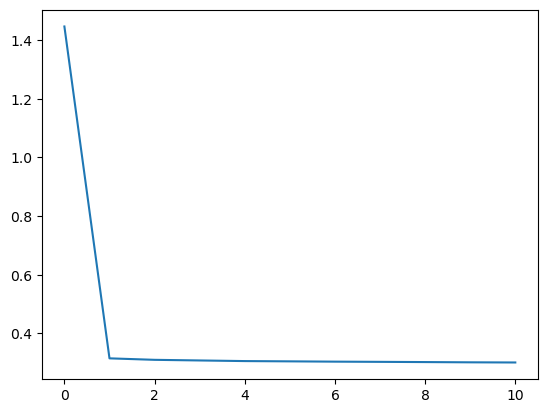

In [77]:
plt.plot(ys['ICG6P'])

In [83]:
from source.parameter_estimation.training import create_log_params_means_centered_loss_func2,log_transform_parameters,exponentiate_parameters
# log_loss_func_GP1=jax.jit(create_log_params_means_centered_loss_func2(glycolyse_GP1,loss_targets_glucose_pulse))

loss_targets_glucose_pulse=[0,1,2,4,5,6,8,10,12,13,14,20,21,22]




# log_loss_func_GP1=jax.jit(create_log_params_means_centered_loss_func2(glycolysis1,loss_targets_glucose_pulse))



Array(1.97361845, dtype=float64)

In [81]:
log_transform_parameters(params)

{'p_GLT_KmGLTGLCi': Array(0.01120936, dtype=float64),
 'p_GLT_KmGLTGLCo': Array(0.01120936, dtype=float64),
 'p_GLT_VmGLT': Array(3.0237344, dtype=float64),
 'p_HXK1_Kadp': Array(-1.51787454, dtype=float64),
 'p_HXK1_Katp': Array(-3.42507502, dtype=float64),
 'p_HXK1_Keq': Array(11.86159099, dtype=float64),
 'p_HXK1_Kg6p': Array(5.11698432, dtype=float64),
 'p_HXK1_Kglc': Array(-1.52159762, dtype=float64),
 'p_HXK1_Kt6p': Array(-7.09788782, dtype=float64),
 'p_HXK_Vmax': Array(2.64496375, dtype=float64),
 'p_NTH1_Ktre': Array(1.07635386, dtype=float64),
 'p_NTH1_kcat': Array(2.17415071, dtype=float64),
 'f_NTH1': Array(-8.96578428, dtype=float64),
 'p_NTH1_Vmax': Array(-6.79163357, dtype=float64),
 'p_PGI1_Keq': Array(-0.06431396, dtype=float64),
 'p_PGI1_Kf6p': Array(2.85664713, dtype=float64),
 'p_PGI1_Kg6p': Array(5.04740315, dtype=float64),
 'p_PGI1_Vmax': Array(1.21505728, dtype=float64),
 'km_sinkG6P': Array(-6.64385619, dtype=float64),
 'p_PGM1_Keq': Array(4.41923549, dtype=floa